In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sleep_df = pd.read_json("data/sleep-2019-06-01.json",  convert_dates=True)
print(sleep_df)

          logId dateOfSleep                startTime                  endTime  \
0   22919218280  2019-07-01  2019-06-30T21:42:30.000  2019-07-01T06:53:00.000   
1   22907959315  2019-06-30  2019-06-29T22:50:30.000  2019-06-30T08:22:30.000   
2   22896495948  2019-06-29  2019-06-28T23:00:30.000  2019-06-29T07:34:30.000   
3   22885271917  2019-06-28  2019-06-27T23:25:30.000  2019-06-28T07:01:00.000   
4   22873469544  2019-06-27  2019-06-27T00:22:30.000  2019-06-27T06:37:30.000   
5   22859901781  2019-06-26  2019-06-25T23:10:30.000  2019-06-26T06:41:30.000   
6   22835159082  2019-06-24  2019-06-23T22:23:30.000  2019-06-24T06:34:30.000   
7   22835159081  2019-06-23  2019-06-22T23:07:00.000  2019-06-23T06:42:00.000   
8   22835159080  2019-06-22  2019-06-22T01:42:00.000  2019-06-22T07:36:30.000   
9   22799331499  2019-06-21  2019-06-20T22:55:00.000  2019-06-21T06:35:30.000   
10  22786383973  2019-06-20  2019-06-19T22:24:00.000  2019-06-20T06:22:00.000   
11  22773778389  2019-06-19 

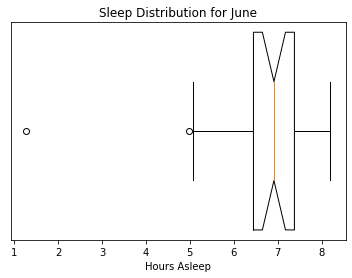

In [3]:
ax = plt.gca()
ax.set_title('Sleep Distribution for June')
ax.boxplot(sleep_df['minutesAsleep']/60, vert=False,manage_ticks=False, notch=True)
plt.xlabel("Hours Asleep")
ax.set_yticks([])
plt.show()

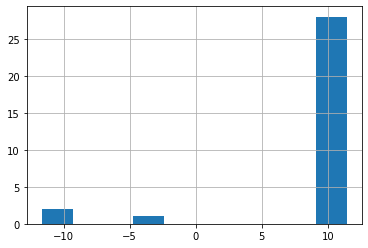

In [4]:
startTimes = pd.to_datetime(sleep_df['startTime'])
sleep = pd.to_datetime(sleep_df['startTime']).dt.hour -12 + pd.to_datetime(sleep_df['startTime']).dt.minute/60
sleep.hist()

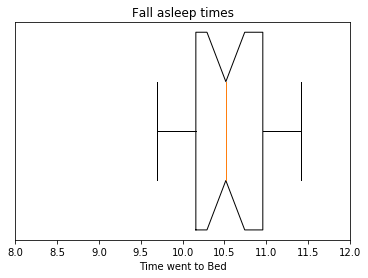

In [5]:
ax = plt.gca()
ax.set_title('Fall asleep times')
ax.boxplot(sleep, vert=False,manage_ticks=False, notch=True)
plt.xlabel("Time went to Bed")
plt.xlim(8, 12)
ax.set_yticks([])
plt.show()

In [6]:
def getAllSleepData():
    files = os.listdir("data")
    dfs = []
    for file in files: # this can take 15 seconds
        if "sleep-" in file: # finds the steps files
            dfs.append(pd.read_json("data/" + file,  convert_dates=['startTime', 'endTime']))
    return pd.concat(dfs)

In [7]:
sleep_df = getAllSleepData()

In [8]:
sleep_df['start'] = sleep_df['startTime'].dt.hour - 12 + sleep_df['startTime'].dt.minute/60
sleep_df['end'] = sleep_df['endTime'].dt.hour + sleep_df['endTime'].dt.minute/60

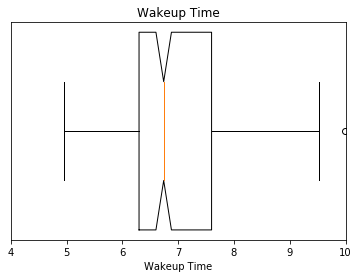

In [9]:
ax = plt.gca()
ax.set_title('Wakeup Time')
ax.boxplot(sleep_df['end'], vert=False,manage_ticks=False, notch=True)
plt.xlabel("Wakeup Time")
ax.set_yticks([])
plt.xlim(4, 10)
plt.show()

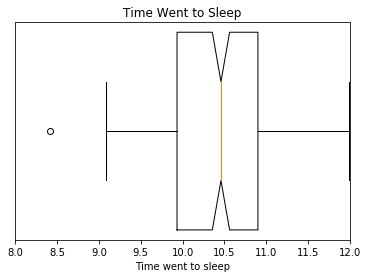

In [10]:
ax = plt.gca()
ax.set_title('Time Went to Sleep')
ax.boxplot(sleep_df['start'], vert=False,manage_ticks=False, notch=True)
plt.xlabel("Time went to sleep")
ax.set_yticks([])
plt.xlim(8, 12)
plt.show()

In [11]:
sleep_df['weekday'] = sleep_df['startTime'].dt.weekday

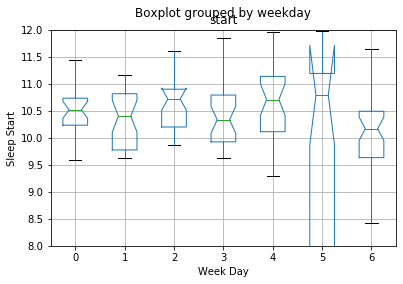

In [12]:
ax = plt.gca()
ax.set_title('Steps Distribution for July\n')
sleep_df.boxplot(column=['start'], by='weekday',ax=ax, notch=True)
plt.xlabel("Week Day")
plt.ylabel("Sleep Start")
plt.ylim(8, 12)
plt.show()

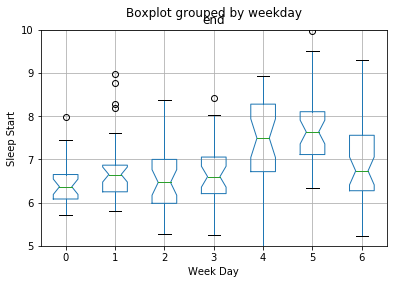

In [13]:
ax = plt.gca()
ax.set_title('Wake Up Time')
sleep_df.boxplot(column=['end'], by='weekday',ax=ax, notch=True)
plt.xlabel("Week Day")
plt.ylabel("Sleep Start")
plt.ylim(5, 10)
plt.show()